In [1]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', -1)

In [3]:
#read data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
feature_desc = pd.read_csv("feature_descriptions.csv")

train_labels = pd.read_csv("train_labels.csv")

In [4]:
#concate train_labels to train
train = pd.merge(train,
                 train_labels,
                 on = 'id')

In [5]:
#label data as test/train
train['dataType'] = 'train'
test['dataType'] = 'test'

In [6]:
trainTest = pd.concat([train,test], sort=True)

In [7]:
train.shape

(59400, 42)

In [8]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,dataType
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,train
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,train
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,train
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train


In [9]:
train.isnull().sum()

id                       0    
amount_tsh               0    
date_recorded            0    
funder                   3635 
gps_height               0    
installer                3655 
longitude                0    
latitude                 0    
wpt_name                 0    
num_private              0    
basin                    0    
subvillage               371  
region                   0    
region_code              0    
district_code            0    
lga                      0    
ward                     0    
population               0    
public_meeting           3334 
recorded_by              0    
scheme_management        3877 
scheme_name              28166
permit                   3056 
construction_year        0    
extraction_type          0    
extraction_type_group    0    
extraction_type_class    0    
management               0    
management_group         0    
payment                  0    
payment_type             0    
water_quality            0    
quality_

In [10]:
threshold5per = len(train)*.05

In [11]:
columns2Drop = train.columns[train.isnull().sum()>threshold5per]

In [12]:
columns2Drop

Index(['funder', 'installer', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit'],
      dtype='object')

In [13]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [14]:
print(cat_col)

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group', 'dataType']


In [15]:
print(train[cat_col].nunique())
print()
print(train[cat_col].nunique()>21)

#convert date_recorded into an actual date
#drop anything with more than 21 different categories
#drop recorded_by as only has 1 unique value

#needed to update my pandas on mac.  Now working.  

#LESSONS LEARNED
#if something works on one computer, and not the other, update the packates

date_recorded            356  
funder                   1897 
installer                2145 
wpt_name                 37400
basin                    9    
subvillage               19287
region                   21   
lga                      125  
ward                     2092 
public_meeting           2    
recorded_by              1    
scheme_management        12   
scheme_name              2696 
permit                   2    
extraction_type          18   
extraction_type_group    13   
extraction_type_class    7    
management               12   
management_group         5    
payment                  7    
payment_type             7    
water_quality            8    
quality_group            6    
quantity                 5    
quantity_group           5    
source                   10   
source_type              7    
source_class             3    
waterpoint_type          7    
waterpoint_type_group    6    
status_group             3    
dataType                 1    
dtype: i

In [16]:
columns2drop2 = ['wpt_name','subvillage','lga','ward','recorded_by','id']

In [17]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [18]:
#convert string date to date time
train['date_recorded'] = pd.to_datetime(train['date_recorded'])
trainTest['date_recorded'] = pd.to_datetime(trainTest['date_recorded'])

In [19]:
#create columns to split out the data
train['year'] = pd.DatetimeIndex(train['date_recorded']).year
train['month'] = pd.DatetimeIndex(train['date_recorded']).month
train['day'] = pd.DatetimeIndex(train['date_recorded']).day

trainTest['year'] = pd.DatetimeIndex(trainTest['date_recorded']).year
trainTest['month'] = pd.DatetimeIndex(trainTest['date_recorded']).month
trainTest['day'] = pd.DatetimeIndex(trainTest['date_recorded']).day

In [20]:
print('Unique Years: {}'.format(train.year.nunique()))
print('Unique Months: {}'.format(train.month.nunique()))
print('Unique Days: {}'.format(train.day.nunique()))

Unique Years: 5
Unique Months: 12
Unique Days: 31


2011    28674
2013    24271
2012    6424 
2004    30   
2002    1    
Name: year, dtype: int64


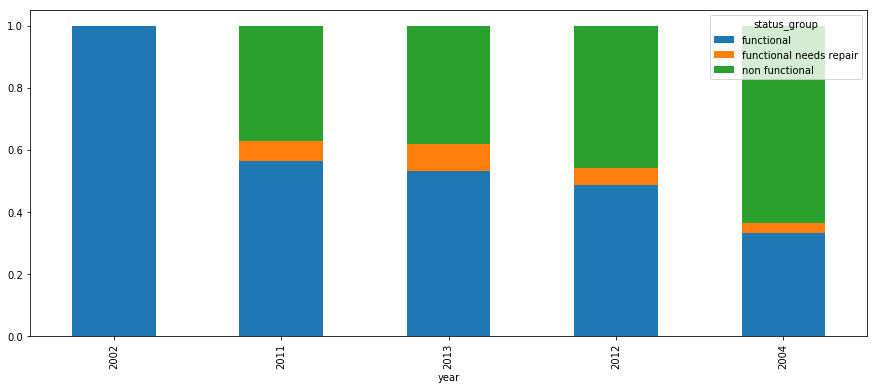

In [21]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('year').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

#how many counts did we have for 2002 and 2004?
print(train.year.value_counts())

#any data before 2011 may not be helpful.  Possible that the data is way less accurate

In [22]:
#pre2011 engineering
def pre2011(x):
    if x < 2011:
        return(1)
    else:
        return(0)

trainTest['pre2011'] = trainTest['year'].apply(pre2011)

trainTest.pre2011.value_counts()

0    74207
1    43   
Name: pre2011, dtype: int64

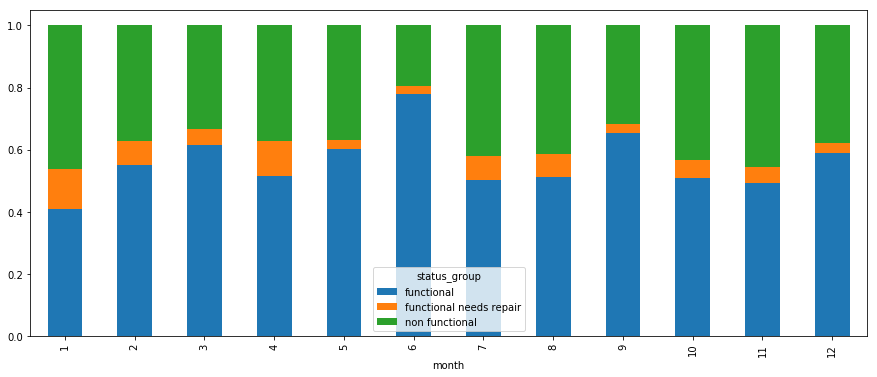

In [23]:
train.groupby('month').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#Observations

#June is by far the highest - feature engineering
#last month of the quarter is the best - feature engineering 

#hypothesis that non profits or NGOs have money they need to use at by the end of the quarter, so use it or lose it
#and spend on making wells

In [24]:
def quartermonth(x):
    if x % 3 == 0:
        return(3)
    if x % 3 == 2:
        return(2)
    if x % 3 == 1:
        return(1)        

In [25]:
train['quarterMonth'] = train['month'].apply(quartermonth)
trainTest['quarterMonth'] = trainTest['month'].apply(quartermonth)

In [26]:
num_col = list(train.select_dtypes(exclude = ['object']).columns)
print(num_col)

['id', 'amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'year', 'month', 'day', 'quarterMonth']


In [27]:
# ['amount_tsh','gps_height','longitude','latitude', 'num_private', 'region_code', 'district_code']
# ['population','construction_year', 'year', 'month', 'day', 'quarterMonth']

In [28]:
train.num_private.describe()

count    59400.000000
mean     0.474141    
std      12.236230   
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      1776.000000 
Name: num_private, dtype: float64

In [29]:
"""
sns.pairplot(train[['amount_tsh','gps_height','longitude','latitude',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')
"""
#things to clean

#clean the weird latitude and longitude
#lots of amount_tsh
#lots of 0 depth of the well

"\nsns.pairplot(train[['amount_tsh','gps_height','longitude','latitude',\n                    'status_group']], \n             hue = 'status_group',\n            diag_kind = 'kde')\n"

In [30]:
#sns.lmplot(x = 'latitude', y = 'longitude', data = train, hue = 'status_group',fit_reg = False)
#need to get rid of the combo 0 latitude and 0 longitude

In [31]:
#explore which ones are missing values
print(train['basin'][train.latitude == -2.000000e-08].value_counts())
print()
print(train['basin'][train.longitude == 0].value_counts())

#only Lake Vic & Tang are missing values 

Lake Victoria      1713
Lake Tanganyika    99  
Name: basin, dtype: int64

Lake Victoria      1713
Lake Tanganyika    99  
Name: basin, dtype: int64


In [32]:
#Replace off values with NaNs
train.latitude.replace(to_replace = -2.000000e-08,value = np.nan,inplace = True)
train.longitude.replace(to_replace = 0,value = np.nan,inplace = True)

trainTest.latitude.replace(to_replace = -2.000000e-08,value = np.nan,inplace = True)
trainTest.longitude.replace(to_replace = 0,value = np.nan,inplace = True)

In [33]:
#explore which ones are missing values
print(test['basin'][test.latitude == -2.000000e-08].value_counts())
print()
print(test['basin'][test.longitude == 0].value_counts())

Lake Victoria      432
Lake Tanganyika    25 
Name: basin, dtype: int64

Lake Victoria      432
Lake Tanganyika    25 
Name: basin, dtype: int64


In [34]:
# replace the missing value 

#no longer need some of the manual calculations I did above
train['latitude'].fillna(train.groupby('basin')['latitude'].transform('mean'), inplace = True)
train['longitude'].fillna(train.groupby('basin')['longitude'].transform('mean'), inplace = True)

trainTest['latitude'].fillna(trainTest.groupby('basin')['latitude'].transform('mean'), inplace = True)
trainTest['longitude'].fillna(trainTest.groupby('basin')['longitude'].transform('mean'), inplace = True)

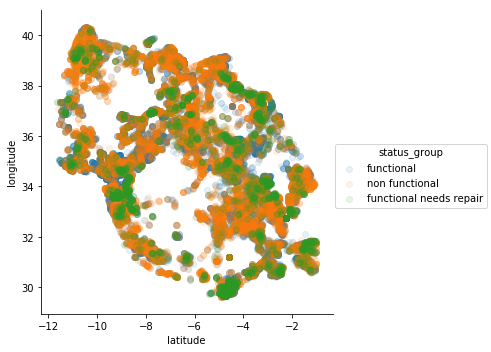

In [35]:
sns.lmplot(x = 'latitude', y = 'longitude', 
           data = train, hue = 'status_group',fit_reg = False, 
           scatter_kws={'alpha':0.1})

In [36]:
"""
Latitude is written before longitude. 
Latitude is written with a number, followed by either “north” or “south”
depending on whether it is located north or south of the equator. 

Longitude is written with a number, followed by either “east” or “west” 
depending on whether it is located east or west of the Prime Meridian.
"""

'\nLatitude is written before longitude. \nLatitude is written with a number, followed by either “north” or “south”\ndepending on whether it is located north or south of the equator. \n\nLongitude is written with a number, followed by either “east” or “west” \ndepending on whether it is located east or west of the Prime Meridian.\n'

In [37]:
"""
sns.pairplot(train[['amount_tsh','gps_height','longitude','latitude',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')
"""

"\nsns.pairplot(train[['amount_tsh','gps_height','longitude','latitude',\n                    'status_group']], \n             hue = 'status_group',\n            diag_kind = 'kde')\n"

In [38]:
train['amount_tsh'].value_counts()
#drop amount_tsh, not convinced it should be 0 

0.00         41639
500.00       3102 
50.00        2472 
1000.00      1488 
20.00        1463 
200.00       1220 
100.00       816  
10.00        806  
30.00        743  
2000.00      704  
250.00       569  
300.00       557  
5000.00      450  
5.00         376  
25.00        356  
3000.00      334  
1200.00      267  
1500.00      197  
6.00         190  
600.00       176  
4000.00      156  
2400.00      145  
2500.00      139  
6000.00      125  
7.00         69   
8000.00      61   
750.00       59   
40.00        59   
10000.00     57   
12000.00     51   
             ..   
16000.00     2    
16300.00     2    
800.00       2    
11000.00     2    
590.00       2    
520.00       2    
26000.00     2    
13000.00     2    
9.00         1    
170000.00    1    
200000.00    1    
900.00       1    
0.25         1    
53.00        1    
350000.00    1    
306.00       1    
120000.00    1    
26.00        1    
59.00        1    
60000.00     1    
5400.00      1    
70000.00    

In [39]:
train['gps_height'].value_counts()
#going to drop this as well

 0       20438
-15      60   
-16      55   
-13      55   
-20      52   
 1290    52   
-14      51   
 303     51   
-18      49   
-19      47   
 1269    46   
 1295    46   
 1304    45   
-23      45   
 280     44   
 1538    44   
 1286    44   
-8       44   
-17      44   
 1332    43   
 320     43   
 1317    42   
 1293    42   
 1319    42   
 1359    42   
 1264    42   
 1288    42   
 1401    42   
 1303    42   
-27      42   
         ..   
 2506    1    
 2023    1    
-53      1    
 2364    1    
 2332    1    
 2402    1    
 2236    1    
 2420    1    
 2291    1    
 2407    1    
 2080    1    
 2250    1    
 591     1    
 2378    1    
 2535    1    
 2614    1    
 2484    1    
 2450    1    
 2072    1    
 2286    1    
 2567    1    
 2322    1    
 2254    1    
 2264    1    
 2464    1    
 2285    1    
 2424    1    
 2552    1    
 2413    1    
 2385    1    
Name: gps_height, Length: 2428, dtype: int64

In [40]:
train['num_private'].value_counts()
#going to drop this as well

0       58643
6       81   
1       73   
5       46   
8       46   
32      40   
45      36   
15      35   
39      30   
93      28   
3       27   
7       26   
2       23   
65      22   
47      21   
102     20   
4       20   
17      17   
80      15   
20      14   
25      12   
11      11   
41      10   
34      10   
16      8    
120     7    
150     6    
22      6    
12      5    
24      5    
       ..    
14      3    
61      3    
27      2    
26      2    
160     1    
30      1    
698     1    
60      1    
1402    1    
450     1    
668     1    
131     1    
35      1    
672     1    
42      1    
136     1    
87      1    
300     1    
280     1    
141     1    
62      1    
111     1    
240     1    
1776    1    
755     1    
180     1    
213     1    
23      1    
55      1    
94      1    
Name: num_private, Length: 65, dtype: int64

In [41]:
train['construction_year'].value_counts()
#going to drop this as well
#is there another way I could deal with the 0 values.  Because I imagine it could be helpful ???

0       20709
2010    2645 
2008    2613 
2009    2533 
2000    2091 
2007    1587 
2006    1471 
2003    1286 
2011    1256 
2004    1123 
2012    1084 
2002    1075 
1978    1037 
1995    1014 
2005    1011 
1999    979  
1998    966  
1990    954  
1985    945  
1980    811  
1996    811  
1984    779  
1982    744  
1994    738  
1972    708  
1974    676  
1997    644  
1992    640  
1993    608  
2001    540  
1988    521  
1983    488  
1975    437  
1986    434  
1976    414  
1970    411  
1991    324  
1989    316  
1987    302  
1981    238  
1977    202  
1979    192  
1973    184  
2013    176  
1971    145  
1960    102  
1967    88   
1963    85   
1968    77   
1969    59   
1964    40   
1962    30   
1961    21   
1965    19   
1966    17   
Name: construction_year, dtype: int64

In [42]:
columns2drop3 = ['amount_tsh','gps_height','num_private','construction_year']

In [43]:
"""
sns.pairplot(train[['population','construction_year', 'year', 'month', 'day', 'quarterMonth',
                    'status_group']], 
             hue = 'status_group',
            diag_kind = 'kde')
"""
#given these discrete values, not super helpful

"\nsns.pairplot(train[['population','construction_year', 'year', 'month', 'day', 'quarterMonth',\n                    'status_group']], \n             hue = 'status_group',\n            diag_kind = 'kde')\n"

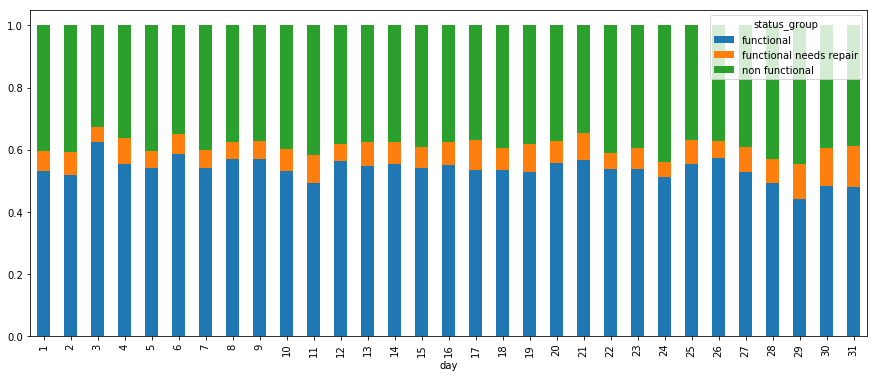

In [44]:
train.groupby('day').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#observations

In [45]:
train[cat_col].columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'dataType'],
      dtype='object')

In [46]:
train.status_group.value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Need to look at a differnet feature groups to see if they are the same or if they have any differences

extraction_type, extraction_type_group, extraction_type_group
management, management_group
payment, payment_type
water_quality, quality_group
quantity, quantity_group
source, source_type, source_group
waterpoint_type, waterpoint_group

In [47]:
train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values('functional',ascending=False)

status_group,functional,functional needs repair,non functional
basin,,,
Lake Nyasa,0.653687,0.049164,0.297148
Rufiji,0.635406,0.054789,0.309804
Pangani,0.600895,0.053356,0.345749
Internal,0.575723,0.071548,0.352730
Wami / Ruvu,0.523802,0.044931,0.431268
Lake Victoria,0.497658,0.096507,0.405835
Lake Tanganyika,0.483053,0.115361,0.401586
Lake Rukwa,0.407498,0.110024,0.482478
Ruvuma / Southern Coast,0.371689,0.072557,0.555753


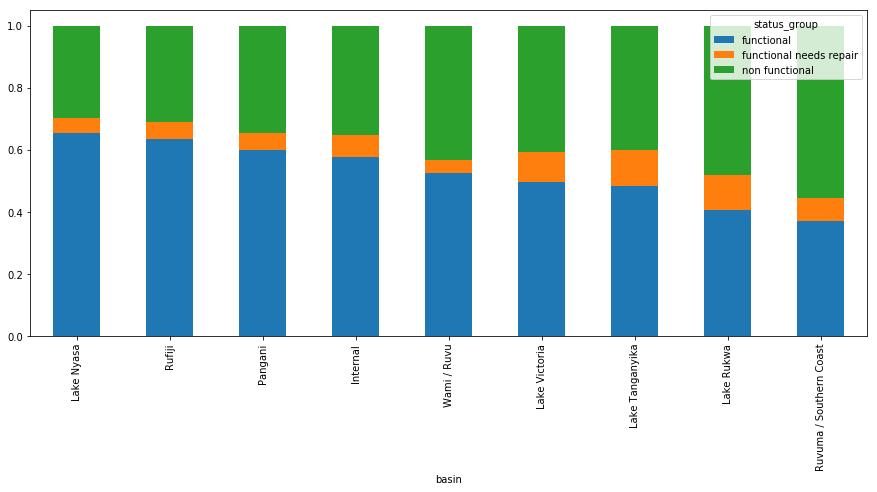

In [48]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

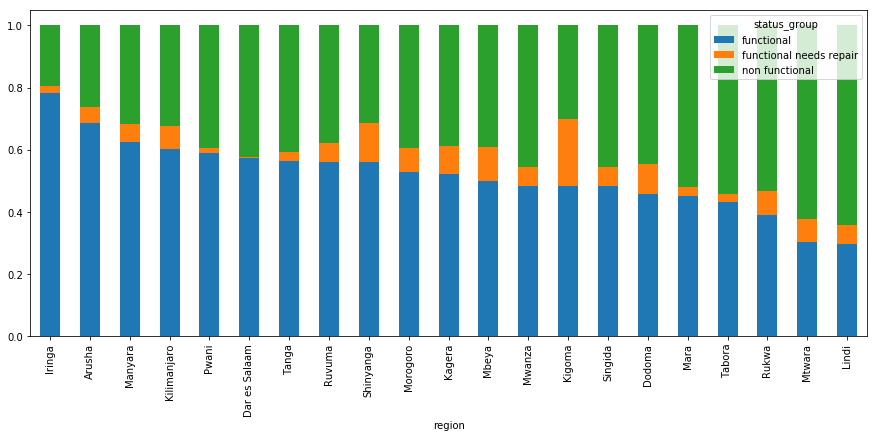

In [49]:
#region
train.groupby('region').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [50]:
train[['extraction_type','extraction_type_group','extraction_type_class']].nunique()

extraction_type          18
extraction_type_group    13
extraction_type_class    7 
dtype: int64

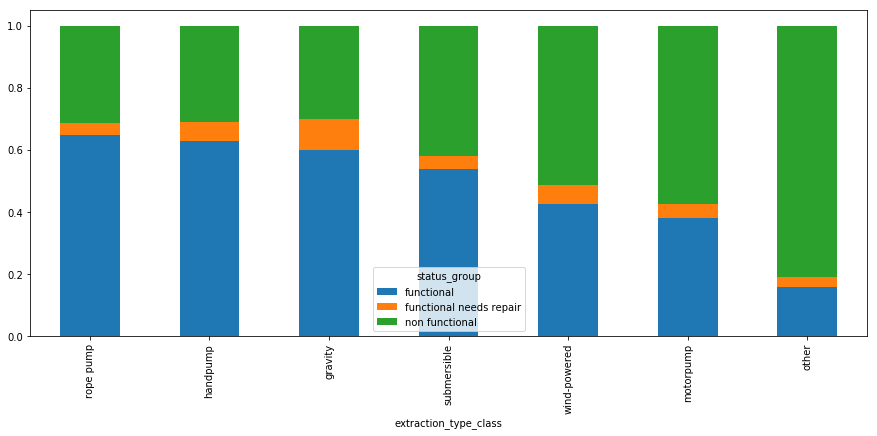

In [51]:
train.groupby('extraction_type_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [52]:
train[['management','management_group']].nunique()

management          12
management_group    5 
dtype: int64

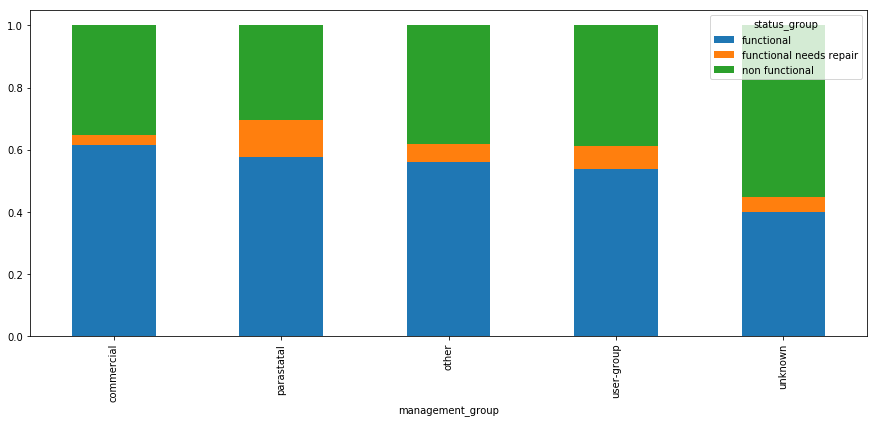

In [53]:
#managment_group
train.groupby('management_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [54]:
train[['payment','payment_type']].nunique()

payment         7
payment_type    7
dtype: int64

In [55]:
print(train.payment.value_counts())
print()
print(train.payment_type.value_counts())

never pay                25348
pay per bucket           8985 
pay monthly              8300 
unknown                  8157 
pay when scheme fails    3914 
pay annually             3642 
other                    1054 
Name: payment, dtype: int64

never pay     25348
per bucket    8985 
monthly       8300 
unknown       8157 
on failure    3914 
annually      3642 
other         1054 
Name: payment_type, dtype: int64


In [56]:
#strongly suspect that payment and payment_type are exactly the same
#and can drop one

poc = train[['payment','payment_type']].copy()

#never pay - confirmed
#pay per buckect - confirmed
#pay monthly - confirmed
#unknown - confirmed
#pay when scheme fails - confirmed
#pay annually - confirmed
#other - confirmed

poc[poc['payment']=='other']


,payment,payment_type
12,other,other
73,other,other
96,other,other
106,other,other
107,other,other
123,other,other
158,other,other
168,other,other
287,other,other
334,other,other


In [57]:
columns2drop4 = ['id','payment']

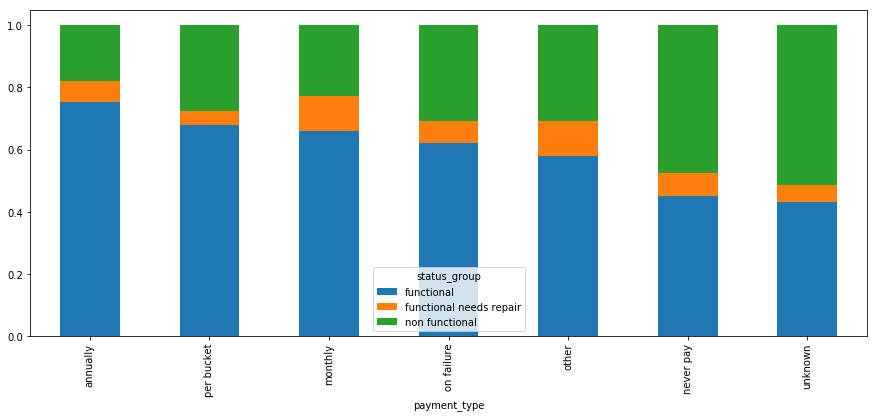

In [58]:
#payment_type
train.groupby('payment_type').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [59]:
train[['water_quality','quantity_group']].nunique()

water_quality     8
quantity_group    5
dtype: int64

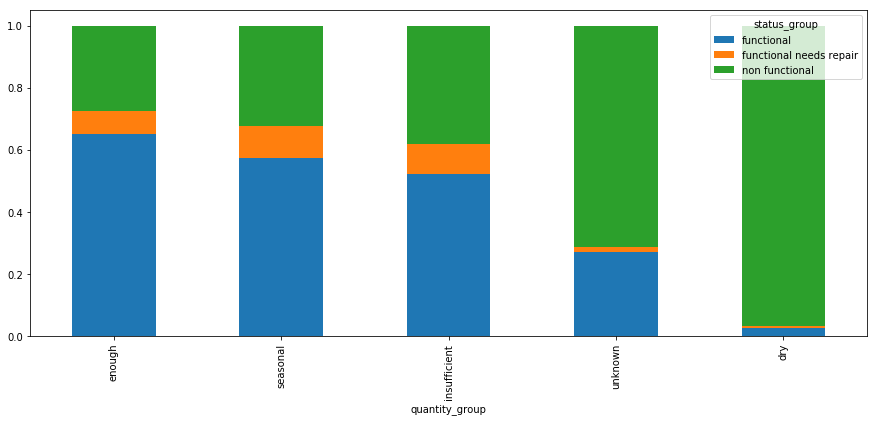

In [60]:
#quanity_group
train.groupby('quantity_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [61]:
train[['source','source_type','source_class']].nunique()

source          10
source_type     7 
source_class    3 
dtype: int64

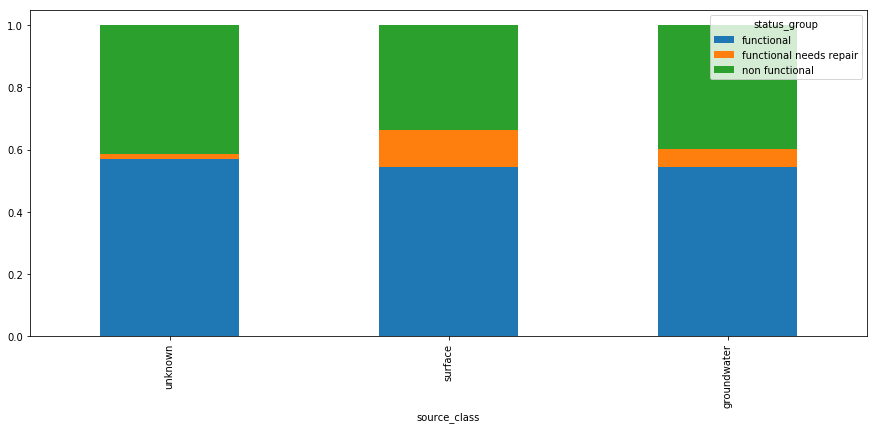

In [62]:
#source_class
train.groupby('source_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [63]:
train[['waterpoint_type','waterpoint_type_group']].nunique()

waterpoint_type          7
waterpoint_type_group    6
dtype: int64

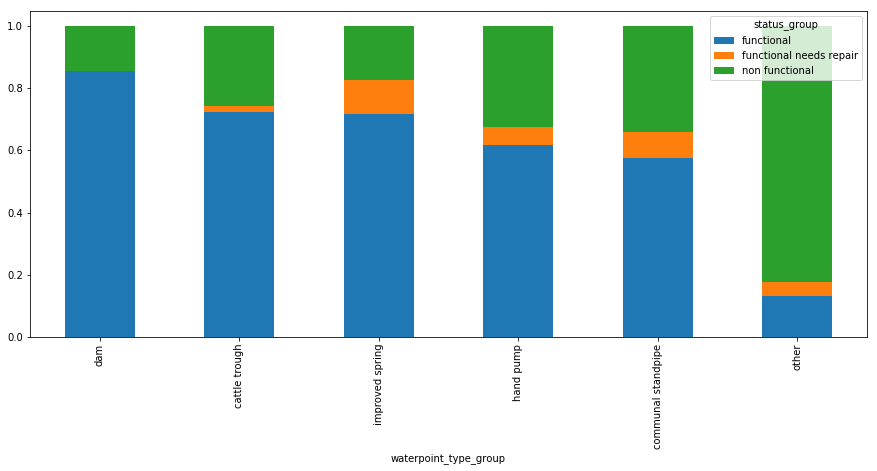

In [64]:
#water_type_group
train.groupby('waterpoint_type_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [65]:
trainTest.head()

,amount_tsh,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,funder,gps_height,id,installer,latitude,lga,longitude,management,management_group,num_private,payment,payment_type,permit,population,public_meeting,quality_group,quantity,quantity_group,recorded_by,region,region_code,scheme_management,scheme_name,source,source_class,source_type,status_group,subvillage,ward,water_quality,waterpoint_type,waterpoint_type_group,wpt_name,year,month,day,pre2011,quarterMonth
0,6000.0,Lake Nyasa,1999,train,2011-03-14,5,gravity,gravity,gravity,Roman,1390,69572,Roman,-9.856322,Ludewa,34.938093,vwc,user-group,0,pay annually,annually,False,109,True,good,enough,enough,GeoData Consultants Ltd,Iringa,11,VWC,Roman,spring,groundwater,spring,functional,Mnyusi B,Mundindi,soft,communal standpipe,communal standpipe,none,2011,3,14,0,3
1,0.0,Lake Victoria,2010,train,2013-03-06,2,gravity,gravity,gravity,Grumeti,1399,8776,GRUMETI,-2.147466,Serengeti,34.698766,wug,user-group,0,never pay,never pay,True,280,NaN,good,insufficient,insufficient,GeoData Consultants Ltd,Mara,20,Other,NaN,rainwater harvesting,surface,rainwater harvesting,functional,Nyamara,Natta,soft,communal standpipe,communal standpipe,Zahanati,2013,3,6,0,3
2,25.0,Pangani,2009,train,2013-02-25,4,gravity,gravity,gravity,Lottery Club,686,34310,World vision,-3.821329,Simanjiro,37.460664,vwc,user-group,0,pay per bucket,per bucket,True,250,True,good,enough,enough,GeoData Consultants Ltd,Manyara,21,VWC,Nyumba ya mungu pipe scheme,dam,surface,dam,functional,Majengo,Ngorika,soft,communal standpipe multiple,communal standpipe,Kwa Mahundi,2013,2,25,0,2
3,0.0,Ruvuma / Southern Coast,1986,train,2013-01-28,63,submersible,submersible,submersible,Unicef,263,67743,UNICEF,-11.155298,Nanyumbu,38.486161,vwc,user-group,0,never pay,never pay,True,58,True,good,dry,dry,GeoData Consultants Ltd,Mtwara,90,VWC,NaN,machine dbh,groundwater,borehole,non functional,Mahakamani,Nanyumbu,soft,communal standpipe multiple,communal standpipe,Zahanati Ya Nanyumbu,2013,1,28,0,1
4,0.0,Lake Victoria,0,train,2011-07-13,1,gravity,gravity,gravity,Action In A,0,19728,Artisan,-1.825359,Karagwe,31.130847,other,other,0,never pay,never pay,True,0,True,good,seasonal,seasonal,GeoData Consultants Ltd,Kagera,18,NaN,NaN,rainwater harvesting,surface,rainwater harvesting,functional,Kyanyamisa,Nyakasimbi,soft,communal standpipe,communal standpipe,Shuleni,2011,7,13,0,1


In [66]:
print(columns2Drop)
print(columns2drop2)
print(columns2drop3)
print(columns2drop4)

Index(['funder', 'installer', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit'],
      dtype='object')
['wpt_name', 'subvillage', 'lga', 'ward', 'recorded_by', 'id']
['amount_tsh', 'gps_height', 'num_private', 'construction_year']
['id', 'payment']


In [67]:
columns2drop = list(columns2Drop)

In [68]:
columns2dropMaster = (columns2drop + columns2drop2 + columns2drop3 + columns2drop4)

In [69]:
columns2dropMaster

['funder',
 'installer',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit',
 'wpt_name',
 'subvillage',
 'lga',
 'ward',
 'recorded_by',
 'id',
 'amount_tsh',
 'gps_height',
 'num_private',
 'construction_year',
 'id',
 'payment']

In [70]:
trainTest.drop(labels = columns2dropMaster, inplace=True, axis =1)

In [71]:
#also is district code are region code are categorical variables, even though they are numbers?
trainTest.drop(labels = ['district_code','region_code','date_recorded'], inplace=True, axis =1)

#need to drop date_recorded because can't train on datetimes

In [72]:
trainTest.tail()

,basin,dataType,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,payment_type,population,quality_group,quantity,quantity_group,region,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth
14845,Wami / Ruvu,test,mono,motorpump,mono,-6.582841,38.852669,vwc,user-group,never pay,20,good,enough,enough,Pwani,river,surface,river/lake,NaN,soft,communal standpipe,communal standpipe,2011,2,24,0,2
14846,Pangani,test,nira/tanira,handpump,nira/tanira,-5.350428,37.451633,vwc,user-group,annually,2960,salty,insufficient,insufficient,Tanga,shallow well,groundwater,shallow well,NaN,salty,hand pump,hand pump,2011,3,21,0,3
14847,Internal,test,gravity,gravity,gravity,-4.585587,34.739804,vwc,user-group,never pay,200,good,insufficient,insufficient,Singida,dam,surface,dam,NaN,soft,communal standpipe,communal standpipe,2013,3,4,0,3
14848,Lake Nyasa,test,gravity,gravity,gravity,-10.584159,35.432732,vwc,user-group,never pay,150,good,insufficient,insufficient,Ruvuma,river,surface,river/lake,NaN,soft,communal standpipe,communal standpipe,2013,2,18,0,2
14849,Lake Nyasa,test,gravity,gravity,gravity,-11.226012,34.765054,vwc,user-group,never pay,40,good,dry,dry,Ruvuma,spring,groundwater,spring,NaN,soft,communal standpipe,communal standpipe,2013,2,13,0,2


In [73]:
trainTest.head()

,basin,dataType,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,payment_type,population,quality_group,quantity,quantity_group,region,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth
0,Lake Nyasa,train,gravity,gravity,gravity,-9.856322,34.938093,vwc,user-group,annually,109,good,enough,enough,Iringa,spring,groundwater,spring,functional,soft,communal standpipe,communal standpipe,2011,3,14,0,3
1,Lake Victoria,train,gravity,gravity,gravity,-2.147466,34.698766,wug,user-group,never pay,280,good,insufficient,insufficient,Mara,rainwater harvesting,surface,rainwater harvesting,functional,soft,communal standpipe,communal standpipe,2013,3,6,0,3
2,Pangani,train,gravity,gravity,gravity,-3.821329,37.460664,vwc,user-group,per bucket,250,good,enough,enough,Manyara,dam,surface,dam,functional,soft,communal standpipe multiple,communal standpipe,2013,2,25,0,2
3,Ruvuma / Southern Coast,train,submersible,submersible,submersible,-11.155298,38.486161,vwc,user-group,never pay,58,good,dry,dry,Mtwara,machine dbh,groundwater,borehole,non functional,soft,communal standpipe multiple,communal standpipe,2013,1,28,0,1
4,Lake Victoria,train,gravity,gravity,gravity,-1.825359,31.130847,other,other,never pay,0,good,seasonal,seasonal,Kagera,rainwater harvesting,surface,rainwater harvesting,functional,soft,communal standpipe,communal standpipe,2011,7,13,0,1


In [74]:
#machine learning imports
#standard sklearn imports
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#sklearn algorithms
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
trainTest.head()

,basin,dataType,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,payment_type,population,quality_group,quantity,quantity_group,region,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth
0,Lake Nyasa,train,gravity,gravity,gravity,-9.856322,34.938093,vwc,user-group,annually,109,good,enough,enough,Iringa,spring,groundwater,spring,functional,soft,communal standpipe,communal standpipe,2011,3,14,0,3
1,Lake Victoria,train,gravity,gravity,gravity,-2.147466,34.698766,wug,user-group,never pay,280,good,insufficient,insufficient,Mara,rainwater harvesting,surface,rainwater harvesting,functional,soft,communal standpipe,communal standpipe,2013,3,6,0,3
2,Pangani,train,gravity,gravity,gravity,-3.821329,37.460664,vwc,user-group,per bucket,250,good,enough,enough,Manyara,dam,surface,dam,functional,soft,communal standpipe multiple,communal standpipe,2013,2,25,0,2
3,Ruvuma / Southern Coast,train,submersible,submersible,submersible,-11.155298,38.486161,vwc,user-group,never pay,58,good,dry,dry,Mtwara,machine dbh,groundwater,borehole,non functional,soft,communal standpipe multiple,communal standpipe,2013,1,28,0,1
4,Lake Victoria,train,gravity,gravity,gravity,-1.825359,31.130847,other,other,never pay,0,good,seasonal,seasonal,Kagera,rainwater harvesting,surface,rainwater harvesting,functional,soft,communal standpipe,communal standpipe,2011,7,13,0,1


In [76]:
#load label encoder
le = preprocessing.LabelEncoder()

In [77]:
#label encode data type
trainTest['dataType'] = le.fit_transform(trainTest['dataType'])

#label status group
trainTest['status_group'] = le.fit_transform(trainTest['status_group'].astype(str))

In [78]:
trainTest.head()

,basin,dataType,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,payment_type,population,quality_group,quantity,quantity_group,region,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth
0,Lake Nyasa,1,gravity,gravity,gravity,-9.856322,34.938093,vwc,user-group,annually,109,good,enough,enough,Iringa,spring,groundwater,spring,0,soft,communal standpipe,communal standpipe,2011,3,14,0,3
1,Lake Victoria,1,gravity,gravity,gravity,-2.147466,34.698766,wug,user-group,never pay,280,good,insufficient,insufficient,Mara,rainwater harvesting,surface,rainwater harvesting,0,soft,communal standpipe,communal standpipe,2013,3,6,0,3
2,Pangani,1,gravity,gravity,gravity,-3.821329,37.460664,vwc,user-group,per bucket,250,good,enough,enough,Manyara,dam,surface,dam,0,soft,communal standpipe multiple,communal standpipe,2013,2,25,0,2
3,Ruvuma / Southern Coast,1,submersible,submersible,submersible,-11.155298,38.486161,vwc,user-group,never pay,58,good,dry,dry,Mtwara,machine dbh,groundwater,borehole,3,soft,communal standpipe multiple,communal standpipe,2013,1,28,0,1
4,Lake Victoria,1,gravity,gravity,gravity,-1.825359,31.130847,other,other,never pay,0,good,seasonal,seasonal,Kagera,rainwater harvesting,surface,rainwater harvesting,0,soft,communal standpipe,communal standpipe,2011,7,13,0,1


In [79]:
#possible pairs to drop one of
    #extraction_type  extraction_type_class  extraction_type_group
    #quantity  quality_group

    #is there a way to explore this

In [80]:
#get dummy variables
trainTest = pd.get_dummies(trainTest)

In [81]:
trainTest.tail()

,dataType,latitude,longitude,population,status_group,year,month,day,pre2011,quarterMonth,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,...,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
14845,0,-6.582841,38.852669,20,2,2011,2,24,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
14846,0,-5.350428,37.451633,2960,2,2011,3,21,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
14847,0,-4.585587,34.739804,200,2,2013,3,4,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
14848,0,-10.584159,35.432732,150,2,2013,2,18,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
14849,0,-11.226012,34.765054,40,2,2013,2,13,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [82]:
#for test ids later
testids = test['id']

#split into train and test sets
train = trainTest[trainTest['dataType'] == 1].copy()
test = trainTest[trainTest['dataType'] == 0].copy()

In [83]:
#drop dataType, no longer needed
train.drop(labels = ['dataType'], inplace=True, axis =1)
test.drop(labels = ['dataType'], inplace=True, axis =1)

In [84]:
#previous shape
#(59400, 42)

#new shape
trainTest.shape

(74250, 159)

In [85]:
test.head()

,latitude,longitude,population,status_group,year,month,day,pre2011,quarterMonth,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,...,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,-4.059696,35.290799,321,2,2013,2,4,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-3.309214,36.656709,300,2,2013,2,4,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,-5.004344,34.767863,500,2,2013,2,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,-9.418672,38.058046,250,2,2013,1,22,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,-10.950412,35.006123,60,2,2013,3,27,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [86]:
#create target variable for validation
target = train.status_group

#remove target variable from train
train = train.drop(['status_group'],axis =1)

In [87]:
#define classifiers
#clf_lin = linear_model.LinearRegression()
clf_rnf = RandomForestClassifier(n_estimators=1000)
#clf_gbc = GradientBoostingClassifier()

In [88]:
#fit classifier
#model_lin = clf_lin.fit(train,target)
model_rnf = clf_rnf.fit(train,target)
#model_gbc = clf_gbc.fit(train,target)

In [90]:
from sklearn.model_selection import KFold, cross_val_score

In [91]:
#lin_scores = cross_val_score(clf_lin, train, target, cv = 10)
rnf_scores = cross_val_score(clf_rnf, train, target, cv = 10)
#gbc_scores = cross_val_score(clf_gbc, train, target, cv = 10)

#for some reason the gbc won't work

KeyboardInterrupt: 

In [ ]:
#print("Lin Avg: {} Lin StDev".format(lin_scores.mean(),lin_scores.stdev()))
#print("lin Avg: {} lin StDev: {}".format(lin_scores.mean(),lin_scores.std()))
print("rnf Avg: {} rnf StDev: {}".format(rnf_scores.mean(),rnf_scores.std()))
#print("gbc Avg: {} gbc StDev: {}".format(rnf_scores.mean(),rnf_scores.std()))

In [97]:
# model is the trained model
importances = model_rnf.feature_importances_

In [99]:
# train_features is the dataframe of training features
feature_list = list(train.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list, 
                                'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', 
                                              ascending = False).reset_index(drop=True)

feature_results.head(30)

,feature,importance
0,longitude,0.162957
1,latitude,0.161880
2,day,0.075881
3,population,0.062415
4,quantity_dry,0.042938
5,quantity_group_dry,0.042938
6,month,0.020130
7,waterpoint_type_group_other,0.017246
8,waterpoint_type_other,0.015577
9,payment_type_never pay,0.015576


In [92]:
rnf_pred = model_rnf.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 157 and input n_features is 158 

In [125]:
rnf_pred = pd.DataFrame(rnf_pred)

In [126]:
rnf_pred.columns = ['status_group']

In [127]:
rnf_pred.status_group.value_counts()

0    8535
3    5502
1    813 
Name: status_group, dtype: int64

In [128]:
def decode(x):
    if x == 0:
        return('functional')
    if x == 1:
        return('functional needs repair')
    if x == 3:
        return('non functional')
    else:
        return('error')

In [129]:
rnf_pred['status_group'] = rnf_pred['status_group'].apply(decode)

In [130]:
rnf_pred.status_group.value_counts(normalize = True)
#predictions are roughly in the same proportions as the test data

functional                 0.574747
non functional             0.370505
functional needs repair    0.054747
Name: status_group, dtype: float64

In [131]:
rnfPred = pd.concat([testids, rnf_pred], axis = 1)

In [132]:
import time
ts = time.gmtime()

In [133]:
current_time = time.strftime("%Y-%m-%d", ts)

In [134]:
print(current_time)

2018-07-13


In [135]:
filename = ('rnfPred_v2_'+current_time+'.csv')

In [136]:
rnfPred.to_csv(filename,index=False)

In [ ]:
rnfPred.shape

In [90]:
#new test from https://github.com/zlatankr/Projects/blob/master/Tanzania/random_forest.ipynb
clf_rnf2  =  RandomForestClassifier(
                                criterion='gini',    #default
                                min_samples_split=6, #default = 2
                                n_estimators=1000,   #default = 10
                                max_features='auto', #default
                                oob_score=True,      #False 
                                random_state=1,      #For replications
                                n_jobs=-1)           #tell it how to run

#so the biggest difference between his code and mine is the number of trees?  and the default splits?
#guess voting across 10 trees would be very different than 1000

In [120]:
rnf_scores2 = cross_val_score(clf_rnf2, train, target, cv = 3)

In [121]:
print("rnf Avg: {} rnf StDev: {}".format(rnf_scores2.mean(),rnf_scores2.std()))

rnf Avg: 0.7992424242424242 rnf StDev: 0.0010075725930939693


In [ ]:
#so looks like when it has all the data, it doesn't need that many trees
#but when you go on unseen test data, you need more.  

In [91]:
clf_rnf2.fit(train,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [92]:
clf_rnf2.oob_score_

0.80893939393939396

In [100]:
test = test.drop(['status_group'],axis =1)

In [101]:
#generate sumbission file
predictions = clf_rnf2.predict(test)

In [103]:
rnf2 = pd.DataFrame(predictions)
rnf2.columns = ['status_group']

In [111]:
rnf2_sub = pd.concat([testids, rnf2], axis = 1)

In [115]:
rnf2_sub['status_group'] = rnf2_sub['status_group'].apply(decode)

In [116]:
rnf2_sub.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [117]:
rnf2_sub.to_csv('rnf2.csv',index=False)

In [ ]:
#used the paramters found by below
#https://github.com/zlatankr/Projects/blob/master/Tanzania/random_forest.ipynb

#how did he find these parameters? 